# ____________________________________________________________________________________________________

## Python Libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ____________________________________________________________________________________________________

## Data Frame Table

In [2]:
# The data_frame output.
df = pd.read_csv('music_genre.csv')

In [3]:
# Column names:

df.columns
#dropping columns
badInfo = ['instance_id','obtained_date','artist_name','track_name']
df.drop(columns=badInfo,axis=1,inplace=True)
#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing tempo
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['tempo'] = np.around(df['tempo'],2)

#fixing duration
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

#dummys
dummiesKey = pd.get_dummies(df["key"])
dummiesMode = pd.get_dummies(df["mode"])
# df['key']=

# ____________________________________________________________________________________________________

## Plot

In [4]:
df.plot(x='artist_name', y='popularity')

plt.show()


KeyError: 'artist_name'

In [0]:
# Plots the numeric energy of the tempo.

df.plot(x='tempo', y = 'energy')
plt.show()

# ____________________________________________________________________________________________________

## Scatter

In [5]:

#fig = px.scatter(df, x='popularity', y= 'key')
#fig.show()

In [6]:
#fig = px.scatter(df, x='key', y= 'popularity')
#fig.show()

In [7]:
#fig3 = px.scatter(df, x='energy', y = 'popularity')
#fig3.show()

In [8]:
#fig4 = px.scatter(df, x='tempo', y = 'popularity')
#fig4.show()

# ____________________________________________________________________________________________________

## Bar

In [9]:
#fig2 = px.bar(df, x='key', y = 'popularity')
#fig2.show()

In [10]:
#fig6 = px.bar(df, x='tempo', y = 'popularity')
#fig6.show()

# ____________________________________________________________________________________________________



## 2D

In [11]:

#sns.set_style('darkgrid')
#plt.figure(figsize=(20, 15))
#plt.plot(df['popularity'], music_dataframe['liveness'], marker = 'x')


# ____________________________________________________________________________________________________



In [12]:

#dropping columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)
#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing tempo
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['tempo'] = np.around(df['tempo'],2)

#fixing duration
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

KeyError: "['instance_id', 'obtained_date', 'artist_name', 'track_name'] not found in axis"

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

target = df["tempo"]
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier


tst = RandomForestClassifier(max_depth=2, random_state=0)

tst.fit(x_train_m, y_train_m)

print(clf.predict([]))

In [13]:
X_train_scaled

NameError: name 'X_train_scaled' is not defined

{'A#': 0, 'D': 1, 'G#': 2, 'C#': 3, 'F#': 4, 'B': 5, 'G': 6, 'F': 7, 'A': 8, 'C': 9, 'E': 10, 'D#': 11} 

{'Minor': 0, 'Major': 1} 

{'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9} 



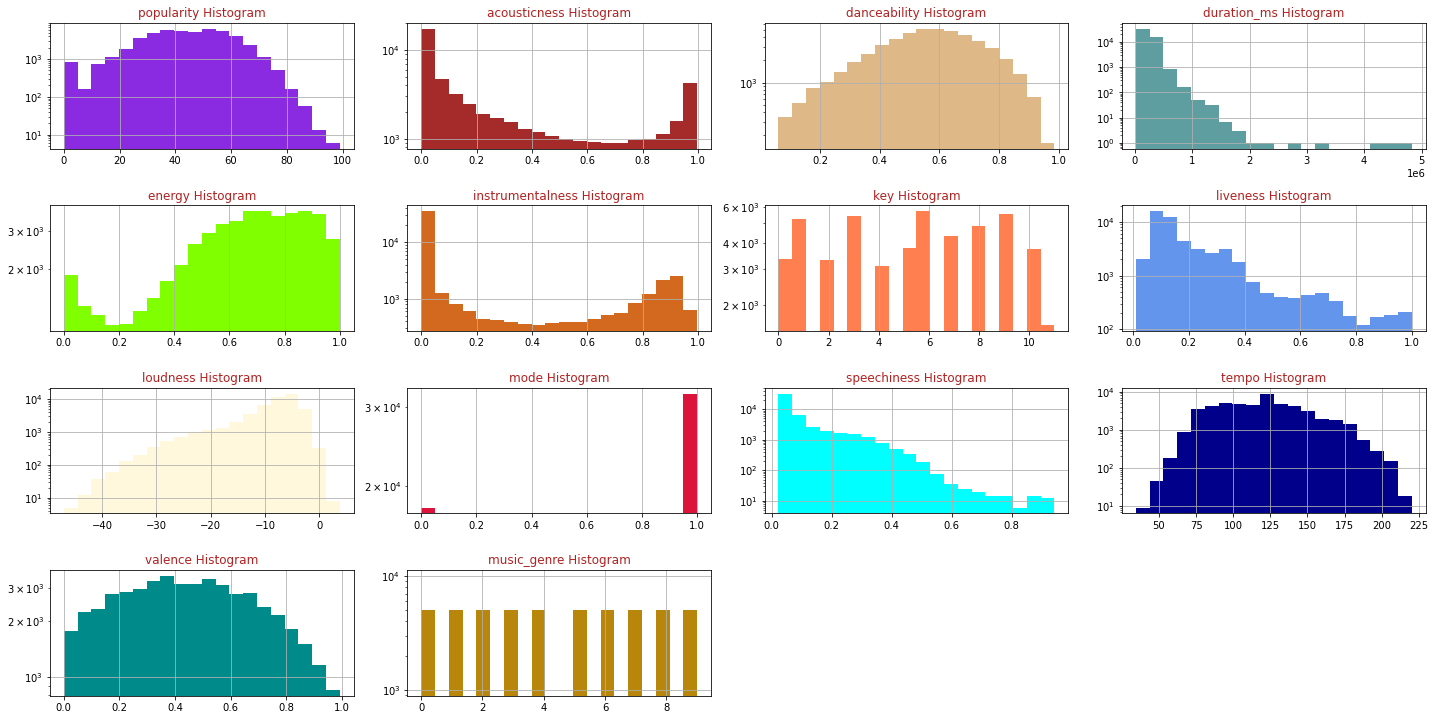

(40000, 13)
(10000, 13)
(40000,)
(10000,)


/projects/afffd160-11c4-4b0e-8185-cf29c729cf98/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


NameError: name 'train_acc' is not defined

In [14]:
#importing libraries
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

#function for converting String columns into numbers
def stringToInt(dataFrame,col):
    test = {}
    for i in dict(enumerate(dataFrame[col].unique())).items():#is a dictionary of the keys and corespodening number
        #makes it so the keys and values of the dictionary switch
        test[i[1]]=i[0]
    print(test,'\n')
    return dataFrame[col].map(test)

#converting string columns
df['key'] = stringToInt(df,'key')
df['mode'] = stringToInt(df,'mode')
df['music_genre'] = stringToInt(df,'music_genre')

#histograms of original dataset
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

#prepocessing dataset
X = df.loc[:, df.columns != 'music_genre']
y = df.music_genre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#model building
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)
X_train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))
test_acc = model.score(X_test_scaled, y_test)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(y_test, y_pred))



# Working Code

In [0]:
#importing libraries
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns


In [0]:
#function for converting String columns into numbers
def stringToInt(dataFrame,col):
    test = {}
    for i in dict(enumerate(dataFrame[col].unique())).items():#is a dictionary of the keys and corespodening number
        #makes it so the keys and values of the dictionary switch
        test[i[1]]=i[0]
    print(test,'\n')
    return dataFrame[col].map(test)

In [0]:
#converting string columns
df['key'] = stringToInt(df,'key')
df['mode'] = stringToInt(df,'mode')
df['music_genre'] = stringToInt(df,'music_genre')

In [0]:
df["key"].head()

In [0]:
#histograms of original dataset
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

In [0]:

#prepocessing dataset
X = df.loc[:, df.columns != 'music_genre']
y = df.music_genre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)



In [0]:
y_test

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


In [15]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#model building
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
X_train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(X_train_acc*100))
test_acc = model.score(X_test_scaled, y_test)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 53.2125
The Accuracy for Test Set is 52.580000000000005
              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1000
           1       0.63      0.63      0.63      1000
           2       0.47      0.41      0.44      1000
           3       0.39      0.31      0.34      1000
           4       0.45      0.58      0.51      1000
           5       0.47      0.38      0.42      1000
           6       0.50      0.44      0.47      1000
           7       0.52      0.65      0.58      1000
           8       0.77      0.80      0.78      1000
           9       0.47      0.51      0.49      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



<AxesSubplot:>

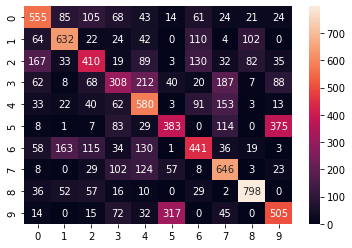

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [18]:


X_train.head()






,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
26455,64.0,0.051200,0.946,263914.0,0.7720,0.000002,10,0.0612,-7.537,0,0.1210,116.97,0.7430
41832,30.0,0.991000,0.203,400268.0,0.0311,0.002510,0,0.0807,-31.284,0,0.0542,102.52,0.0345
21583,38.0,0.143000,0.573,197760.0,0.9500,0.000000,1,0.2180,-3.594,1,0.0515,132.01,0.7030
2629,34.0,0.000723,0.467,309577.0,0.8300,0.017200,2,0.4060,-5.197,1,0.0574,140.03,0.0394
6995,26.0,0.986000,0.270,108507.0,0.1020,0.035200,6,0.0871,-19.713,1,0.0434,115.67,0.0427
